In [1]:
# Step 1: Import Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# Step 2: Load Dataset (You can upload Titanic.csv manually or import via Kaggle)
url = "/content/drive/MyDrive/Btech sem 7 lab/AIDS-2/Titanic-Dataset.csv"
data = pd.read_csv(url)

In [3]:
# Step 3: Display Dataset Info
print("Dataset Preview:")
print(data.head())
print("\nMissing Values:\n", data.isnull().sum())

Dataset Preview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   

In [4]:
# Step 4: Data Preprocessing
data = data[['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'SibSp', 'Parch']]
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Age'].fillna(data['Age'].median(), inplace=True)

/tmp/ipython-input-2357996667.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)


In [5]:
# Step 5: Define Features and Target
X = data.drop('Survived', axis=1)
y = data['Survived']

In [6]:
# Step 6: Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
# Step 7: Train Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)

In [8]:
# Step 8: Train AdaBoost Model
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)
ada_pred = ada_model.predict(X_test)

In [9]:
# Step 9: Evaluate Models
print("\n=== Random Forest Evaluation ===")
print(classification_report(y_test, rf_pred))
print("Accuracy:", accuracy_score(y_test, rf_pred))

print("\n=== AdaBoost Evaluation ===")
print(classification_report(y_test, ada_pred))
print("Accuracy:", accuracy_score(y_test, ada_pred))


=== Random Forest Evaluation ===
              precision    recall  f1-score   support

           0       0.82      0.84      0.83       105
           1       0.76      0.74      0.75        74

    accuracy                           0.80       179
   macro avg       0.79      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 0.7988826815642458

=== AdaBoost Evaluation ===
              precision    recall  f1-score   support

           0       0.82      0.89      0.85       105
           1       0.82      0.72      0.76        74

    accuracy                           0.82       179
   macro avg       0.82      0.80      0.81       179
weighted avg       0.82      0.82      0.81       179

Accuracy: 0.8156424581005587


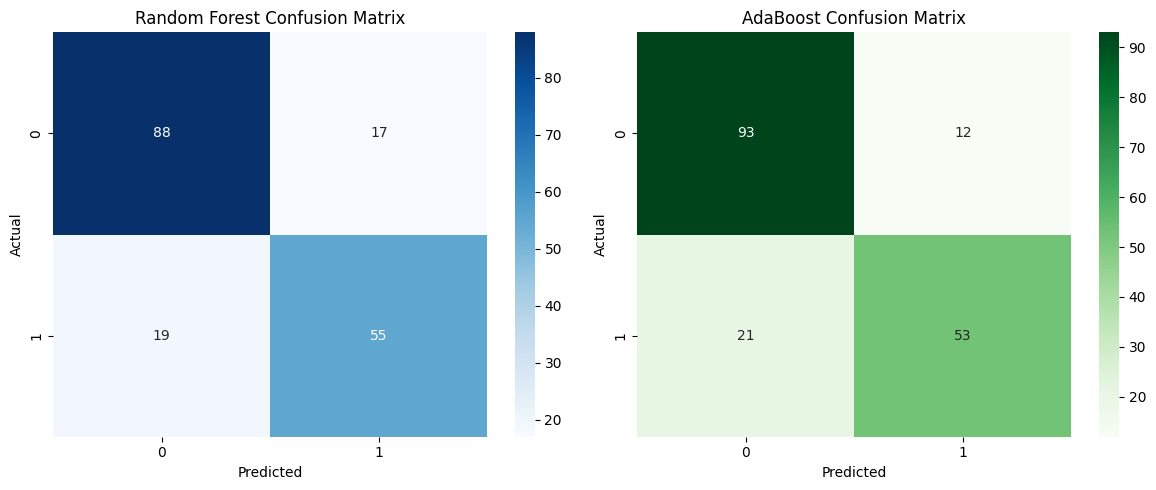

In [10]:
# Step 10: Confusion Matrices
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, rf_pred), annot=True, cmap='Blues', fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, ada_pred), annot=True, cmap='Greens', fmt='d')
plt.title("AdaBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")

plt.tight_layout()
plt.show()

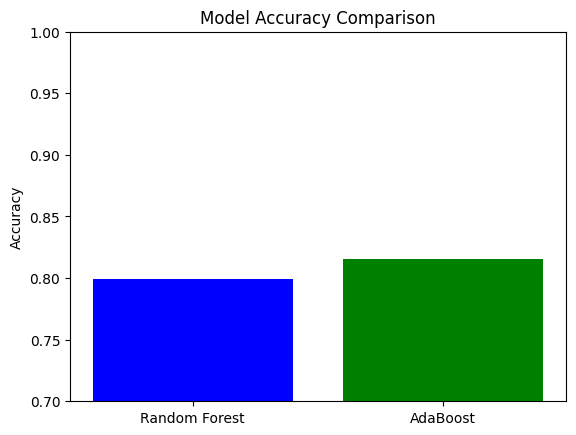

In [11]:
# Step 11: Compare Accuracy
models = ['Random Forest', 'AdaBoost']
accuracy = [accuracy_score(y_test, rf_pred), accuracy_score(y_test, ada_pred)]

plt.bar(models, accuracy, color=['blue','green'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.ylim(0.7, 1.0)
plt.show()


In [12]:
# Step 12: Save Results to CSV
results = pd.DataFrame({
    'Model': models,
    'Accuracy': accuracy
})
results.to_csv('model_evaluation_results.csv', index=False)
print("\nResults saved to model_evaluation_results.csv")

print("\nFinal Comparison Table:")
print(results)


Results saved to model_evaluation_results.csv

Final Comparison Table:
           Model  Accuracy
0  Random Forest  0.798883
1       AdaBoost  0.815642
